In [107]:
## I want to see if any stocks are correlated with a delayed stock i.e. I want to see if I can use a certain stock's value now to predict another's in the future.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Specify the stock symbol and the data range you want
tickers = ['LSCC', 'TSLA', 'ADBE', 'INTC' , 'HSBC', 'NFLX', 'LIND', 'META', 'TM', 'QCOM']

#['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'BRK-B', 
  #  'LVMUY']
### 'TSM', 'V', 'JPM', 'XOM', 'WMT', 'JNJ', 'UNH', 'MA', 'PG', 'ORCL', 
    #'CVX', 'HD', 'KO', 'PEP', 'ASML', 'BABA', 'AVGO', 'LLY', 'ABBV', 'MRK', 
    #'COST', 'T', 'NFLX', 'DIS', 'NEE', 'MCD', 'NVO', 'RHHBY', 'PFE', 'BAC', 
    #SHEL', 'INTC', 'VZ', 'CMCSA', 'ADBE', 'DHR', 'WFC', 'TM', 'HON', 'AMT', 
    #'TXN', 'LIN', 'UPS', 'PM', 'UNP', 'ACN', 'MS', 'AMD', 'CAT', 'MDT', 'C', 
    #'SPGI', 'BLK', 'GS', 'PLD', 'DE', 'SCHW', 'TTE', 'HDB', 'AMGN', 'BHP', 
    #'ITW', 'EQNR', 'CSCO', 'AXP', 'NKE', 'TJX', 'LOW', 'SNY', 'MUFG', 'TD', 
    #'BMY', 'SONY', 'RTX', 'RELX', 'GSK', 'HMC', 'BP', 'AON', 'HSBC', 'LRCX', 
    #'ISRG', 'CNI', 'INTU', 'SAN', 'NOC', 'PGR', 'STT', 'ZTS', 'MMC']  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2023-02-01'

start_date_shifted = '2023-02-02'
end_date_shifted = '2023-03-01'

# Download the data
data = yf.download(tickers , start=start_date,end = end_date)
data_shifted = yf.download(tickers , start=start_date_shifted,end = end_date_shifted)
# Convert to a pandas DataFrame
df = pd.DataFrame(data)
df = df[['Adj Close']]
df_shifted = pd.DataFrame(data_shifted)
df_shifted = df_shifted[['Adj Close']]
# Display the first few rows of the DataFrame
print(df.head())
print(df_shifted.head())

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed

Price                       Adj Close                                         \
Ticker                           ADBE       HSBC       INTC  LIND       LSCC   
Date                                                                           
2023-01-03 00:00:00+00:00  336.920013  27.056755  25.775145  8.06  64.110001   
2023-01-04 00:00:00+00:00  341.410004  27.954939  26.691210  8.81  65.470001   
2023-01-05 00:00:00+00:00  328.440002  28.878788  26.575495  9.06  64.589996   
2023-01-06 00:00:00+00:00  332.750000  29.349262  27.703703  9.10  66.529999   
2023-01-09 00:00:00+00:00  341.980011  29.220951  28.262981  9.14  68.650002   

Price                                                                      \
Ticker                           META        NFLX        QCOM          TM   
Date                                                                        
2023-01-03 00:00:00+00:00  124.484192  294.950012  102.922821  138.279999   
2023-01-04 00:00:00+00:00  127.108803  309.410004  

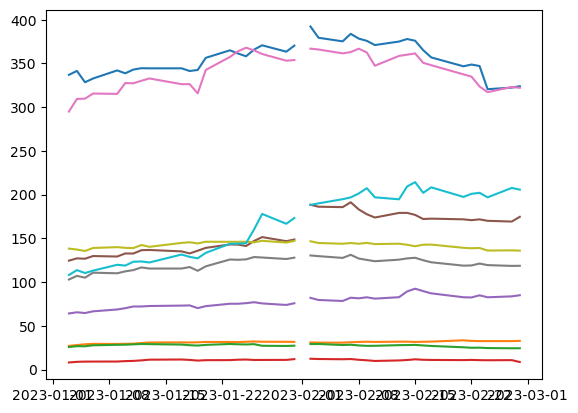

In [109]:
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
for column in df_shifted.columns:
    plt.plot(df_shifted.index, df_shifted[column], label=column)

Price    Adj Close                                                     \
Ticker        ADBE       HSBC       INTC  LIND       LSCC        META   
0       336.920013  27.056755  25.775145  8.06  64.110001  124.484192   
1       341.410004  27.954939  26.691210  8.81  65.470001  127.108803   
2       328.440002  28.878788  26.575495  9.06  64.589996  126.679688   
3       332.750000  29.349262  27.703703  9.10  66.529999  129.753372   
4       341.980011  29.220951  28.262981  9.14  68.650002  129.204498   

Price                                                                          \
Ticker        NFLX        QCOM          TM        TSLA        ADBE       HSBC   
0       294.950012  102.922821  138.279999  108.099998  392.230011  30.991661   
1       309.410004  107.080055  137.190002  113.639999  379.329987  30.786360   
2       309.700012  105.035057  135.520004  110.339996  375.230011  30.726480   
3       315.549988  110.738045  138.970001  113.059998  383.820007  31.205517   
4 

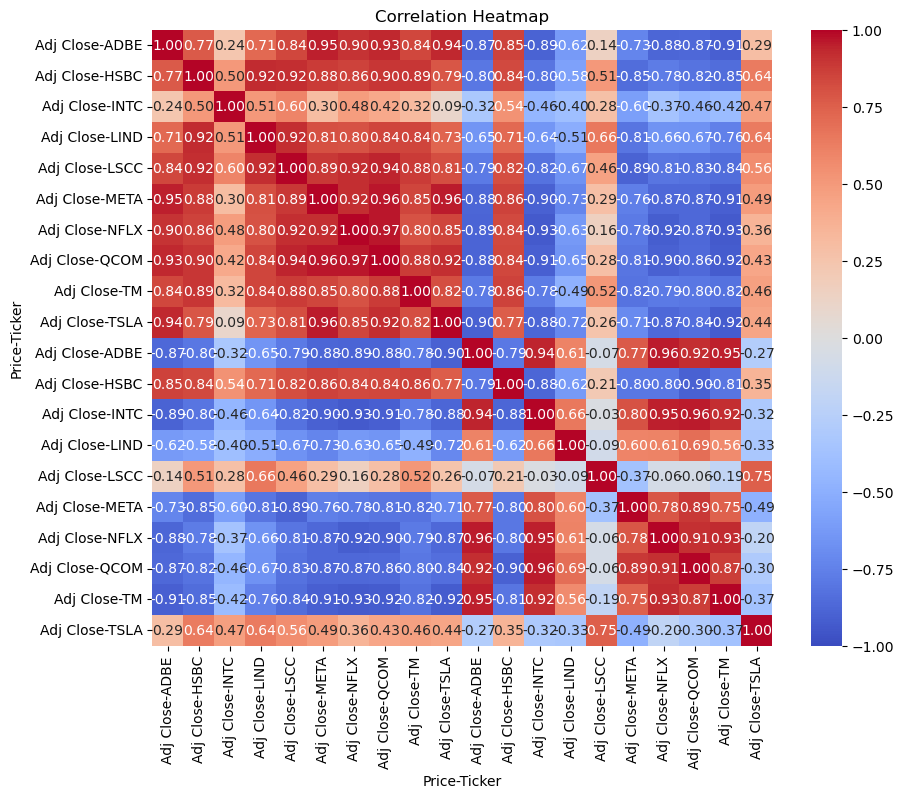

In [111]:

# Compute the correlation matrix
df = df.reset_index(drop=True)
df_shifted = df_shifted.reset_index(drop=True)
df_combined = pd.concat([df, df_shifted], axis=1)
print(df_combined.head())
correlation_matrix = df_combined.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()